# Time Delay Dynamo

Two coupled DDEs that describe the dynamo;\
$\frac{dB_{\phi}(t)}{dt} = \frac{\omega}{L}A(t-T_0) - \frac{B_{\phi}(t)}{\tau}$\
$\frac{dA(t)}{dt} = \alpha_0f(B_{\phi}(t-T_1))B_{\phi}(t-T_1) - \frac{A(t)}{\tau}$\
$f = \frac{\left[1 + erf\left(B^2_{\phi}(t) - B^2_{min}\right) \right] \left[ 1 - erf\left(B^2_{\phi}(t) - B^2_{max}\right) \right]}{4}$

In [5]:
# ''' Gaussian random number generator '''
# import numpy as np
# import random
# import matplotlib.pyplot as plt

# num=[]
# mu=1
# sigma=2.67
# for i in range(25500):
#     temp = random.random()
#     num.append(temp)

# plt.hist(num)

In [ ]:
# =============================================================================
#                               Time Delay Dynamo
# =============================================================================

# Introduction:
#     This code was written by Sanket Wavhal at Indian Institute of Techonology
#     (BHU) Varanasi following the instructions in Wilmot-Smith et al. 2006.


# =====================
# Import Libraries
# =====================

import numpy as np
from scipy.integrate import solve_ivp
from scipy.special import erf
import matplotlib.pyplot as plt
import random

# =====================
# Setting Parameters
# =====================

omega_L = - 0.34          # Differential rotation per unil length
tau = 15                  # Diffusion timescale for the magnetic field
B_min = 1                 # Bmin is the lower limit to the toroidal field strength on which the alpha-effect can act
B_max = 10                # Bmax is the upper limit to the toroidal field strength on which the alpha-effect can act
B_eq = 1
T_0 = 0.656               # accounts for the time taken for a poloidal flux tube to be transported from the site of its production back to the tachocline.
T_1 = 0.164               # accounts for the time taken for a toroidal flux tube to buoyantly rise to the site of poloidal field production.
T_2 = 0.25                # time necessary for the toroidal field to enter the source region where the additional, weak-field alpha-effect is located.
al_0 = 2*10.2             # is the amplitude of the alpha-effect
al_mf = 0.20              # mean field alpha-effect

w_1 = 1 #0.87
w_2 = 1 #7.32
w_3 = 1

dt = 0.05               # Time step
tmax = 5000             # Final time


# Stochastic Fluctuations Parameters
# Gaussian
mu = 1                  # Maen for gaussian fluctuation
sigma = 2.67            # Sigma for gaussian fluctuation
# Constant
delta = 50              # Percent constant fluctuation


# Dynamo Number
N_D = al_0 * omega_L * tau**2
print('Dynamo Number: ', N_D)

# =====================
# Dynamo Equations
# =====================

# Poloidal Field Component
def dynamo_equation1(dt, i, T_0, T_1, T_2, omega_L, tau, alpha, alpha_mf, B_min, B_max, B_eq, B_phi, A_sol):

  # Error Function
  def f1(B_phi_t1):
    # f = ((1 + erf((B_phi_t**2 - B_min**2))) * (1 - erf((B_phi_t**2 - B_max**2))) / 4)
    f1 = ((1 + erf((B_phi_t1**2 - B_min**2)/w_1**2)) * (1 - erf((B_phi_t1**2 - B_max**2)/w_2**2)) / 4)

    return f1

  def f2(B_phi_t2):
    f2 = (1 - erf((B_phi_t2**2 - B_eq**2)/w_3**2))/2
    return f2

  d_A = (tau / (tau + dt))*(dt * (alpha * f1(B_phi[i-int(T_1/dt)]) * B_phi[i-int(T_1/dt)] ) + A_sol[i-1])
                                  #+ alpha_mf * f2(B_phi[i-int(T_2/dt)]) * B_phi[i-int(T_2/dt)]) + A_sol[i-1])
  return [d_A]

# Toroidal Field Component
def dynamo_equation2(dt, i, T_0, T_1, T_2, omega_L, tau, alpha, alpha_mf, B_min, B_max, B_eq, B_phi, A_sol):
  d_B_phi = (tau / (tau + dt))*((omega_L) * A_sol[i-int(T_0/dt)] * dt + B_phi[i-1])
  return [d_B_phi]

# =====================
# Initial Values
# =====================

initial_value = (B_min + B_max) / 2

A_sol = np.ones(int(max(T_0, T_1)/dt)) * initial_value
B_phi = np.ones(int(max(T_0, T_1)/dt)) * initial_value
time = np.linspace(-max(T_0, T_1), 0, int(max(T_0, T_1)/dt))

# =====================
# Solving the DDE!
# =====================

t = 0
k = 0
al = []

for i in range(int(max(T_0, T_1)/dt), int(tmax/dt)):

  if time[i-1] >= k:
    alpha = al_0 #* (1 + (delta/100)*np.random.uniform(-1, 1))          # Constant Fluctuation
    # alpha = al_0 * (random.gauss(mu, sigma))                           # Gaussian Fluctuation

    alpha_mf = al_mf #* (1 + (delta/100)*np.random.uniform(-1, 1))          # Constant Fluctuation
    k = k + 100*dt*2/5

  t = t + dt
  al.append(alpha)
  time = np.append(time, t)
  B_phi = np.append(B_phi, dynamo_equation2(dt, i, T_0, T_1, T_2, omega_L, tau, alpha, alpha_mf, B_min, B_max, B_eq, B_phi, A_sol))
  A_sol = np.append(A_sol, dynamo_equation1(dt, i, T_0, T_1, T_2, omega_L, tau, alpha, alpha_mf, B_min, B_max, B_eq, B_phi, A_sol))

# =====================
# Code Ends Here..
# =====================

Dynamo Number:  -1560.6


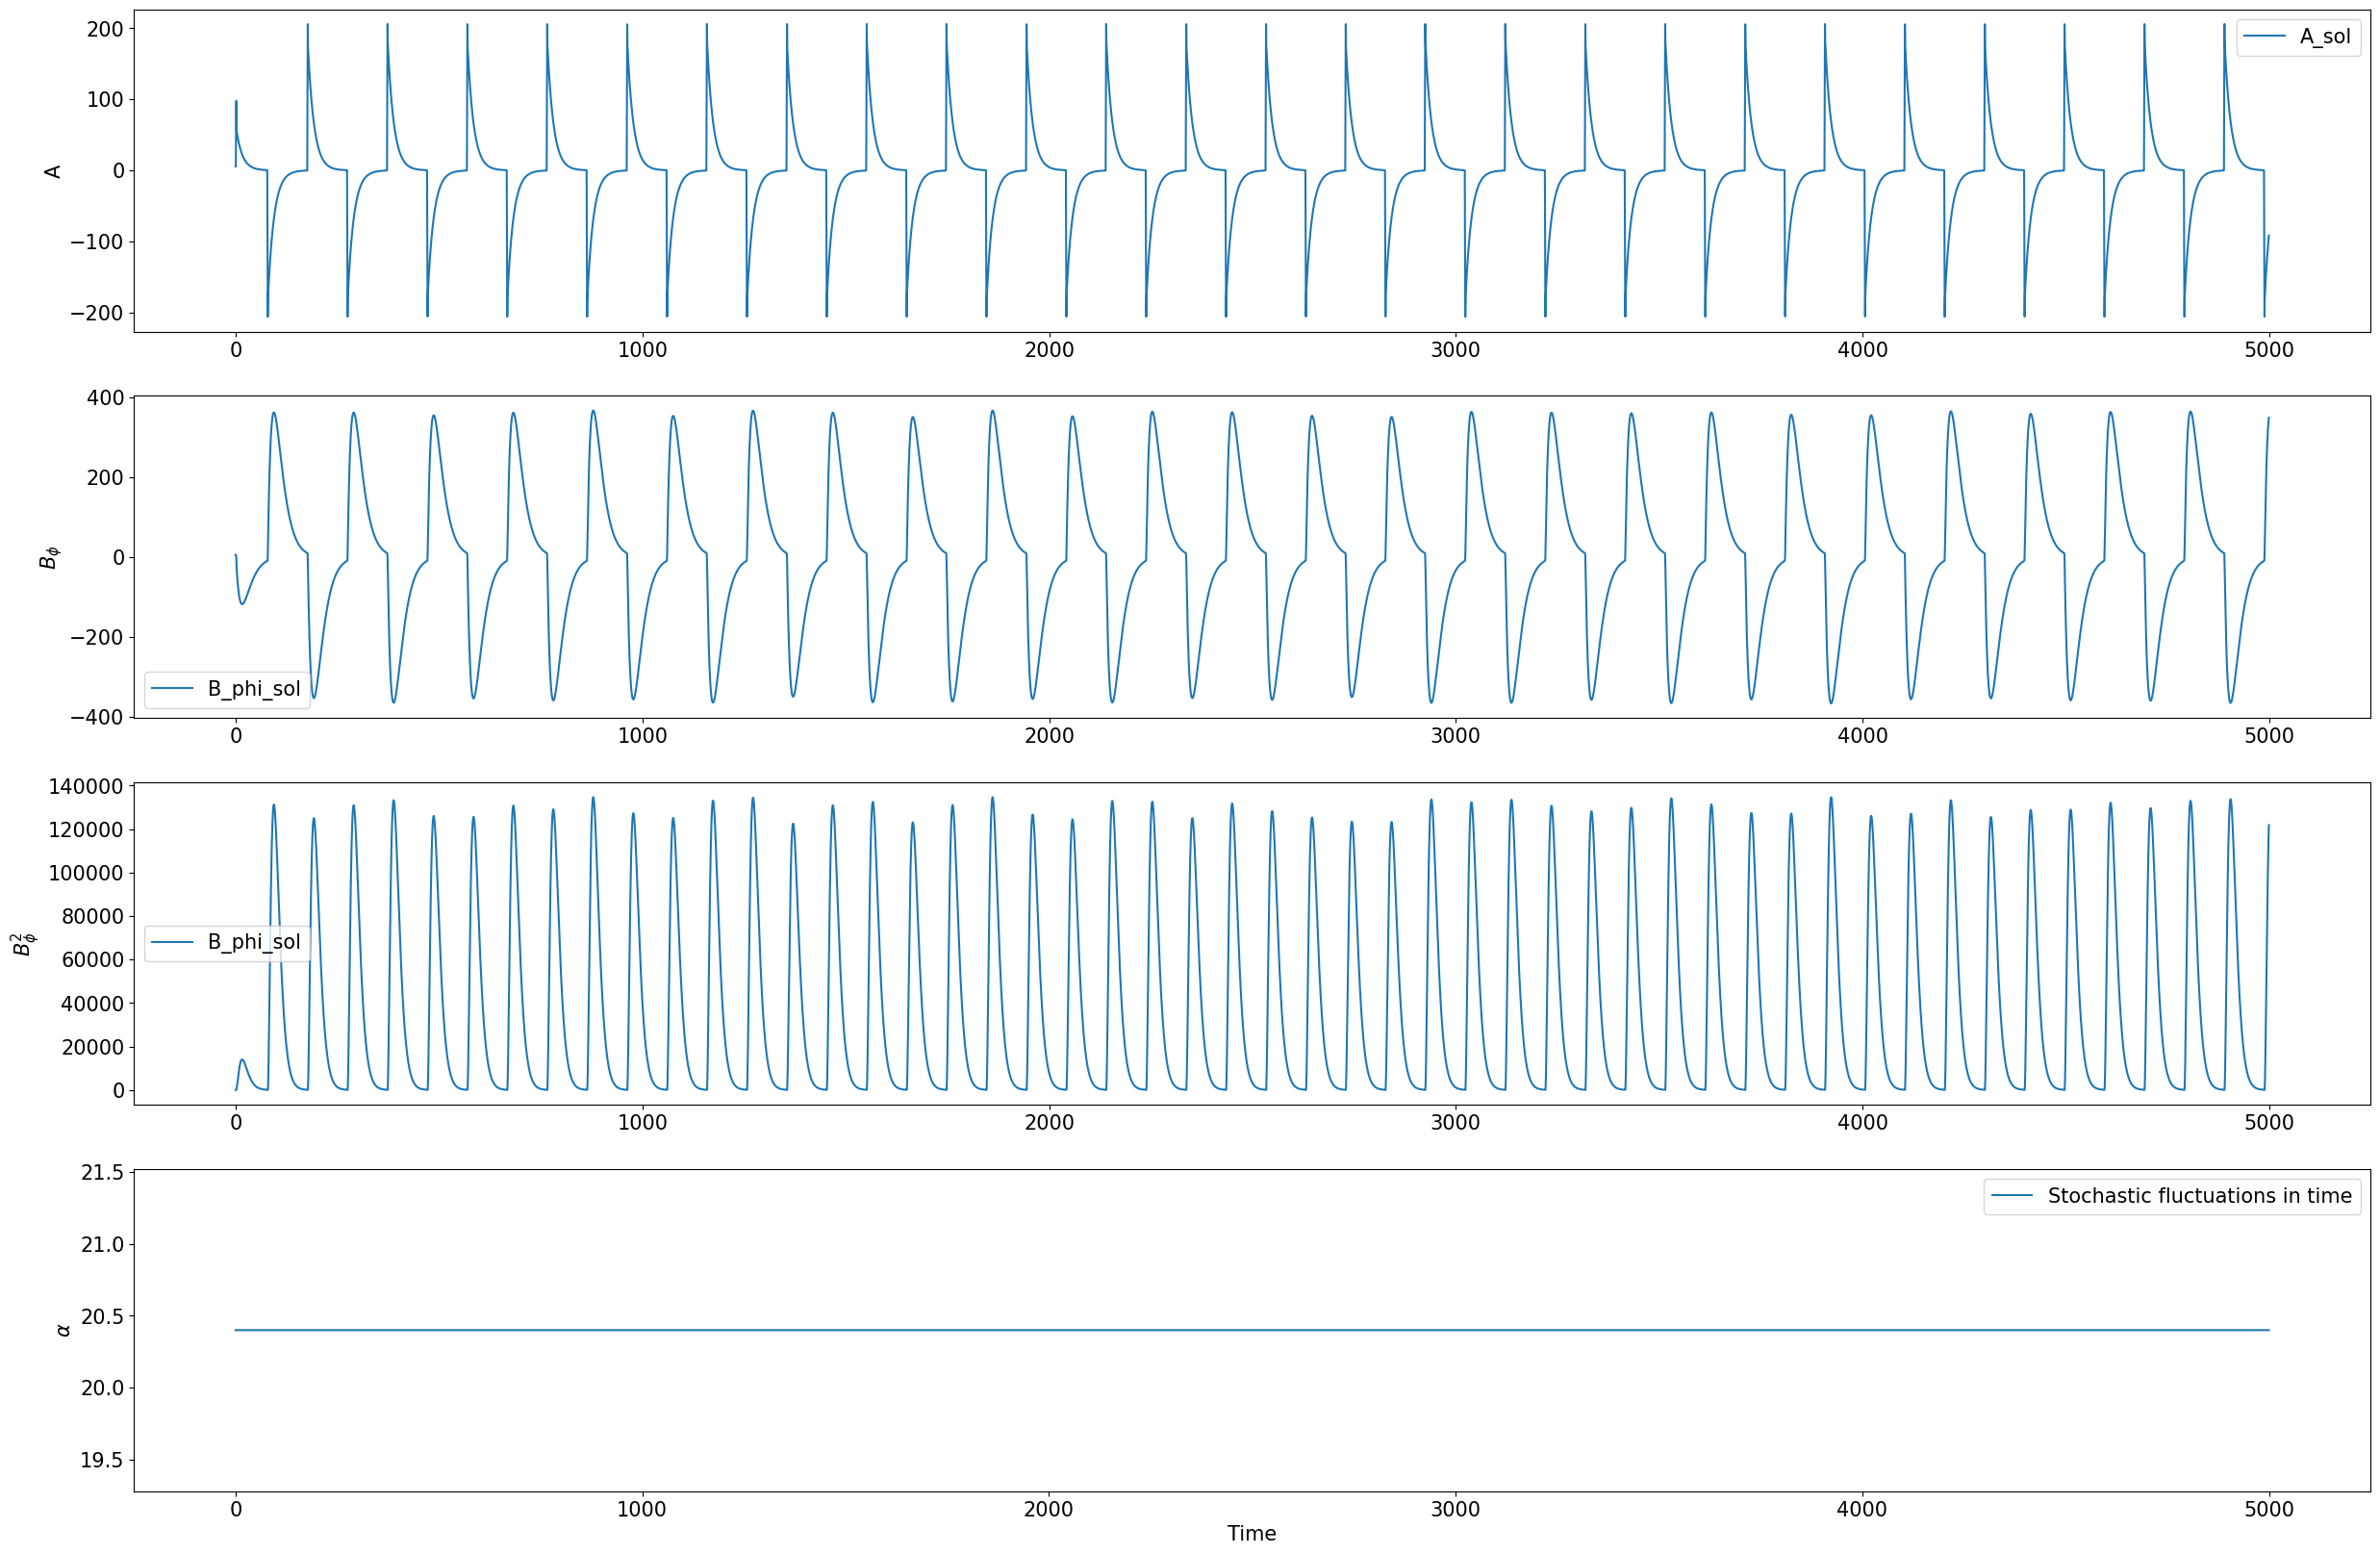

In [ ]:
# =====================
# Plotting the Field
# =====================

# Plot parameters
plt.figure(figsize=(30,20))

import matplotlib as mpl

mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.titlesize'] = 15


# Plotting Poloidal Field
plt.subplot(4, 1, 1)
plt.plot( time, A_sol, label='A_sol')
plt.ylabel('A')
plt.legend(fontsize = 15)


# Plotting Toroidal Field
plt.subplot(4, 1, 2)
plt.plot( time, B_phi, label='B_phi_sol')
plt.ylabel('$B_{\phi}$')
plt.legend(fontsize = 15)


# Plotting Magnetic Activity
plt.subplot(4, 1, 3)
plt.plot( time, B_phi**2, label='B_phi_sol')
plt.ylabel('$B^2_{\phi}$')
# plt.xlabel('Time')
plt.legend(fontsize = 15)


# Plot of alpha values
plt.subplot(4, 1, 4)
plt.xlabel('Time')
plt.ylabel('$\\alpha$')
plt.plot(time[int(max(T_0, T_1)/dt):], al, label='Stochastic fluctuations in time')
plt.legend(fontsize = 15)

plt.show()

